We start the code session with the library imports that we are going to need

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
import ipywidgets as widgets
from scipy.stats import norm
from mpl_toolkits import mplot3d
%matplotlib inline 

## Bivariate and Univariate normal distribution PDFs

### Normal Distribution for marginal Probability Density Function
The normal distribution , also known as the Gaussian distribution, is so called because its based on the Gaussian function . This distribution is defined by two parameters: the mean(μ) , which is the expected value of the distribution, and the standard deviation(σ), which corresponds to the expected deviation from the mean. The square of the standard deviation is typically referred to as the variance.

We denote this distribution as:
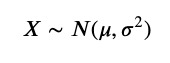


Given this mean and variance we can calculate the probability densitiy function (pdf) of the normal distribution with the normalised Gaussian function. For a value x the density is given by:
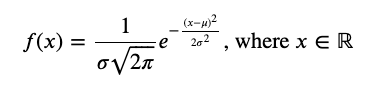

We call this distribution the univariate normal because it consists of only one random normal variable. Three examples of univariate normal distributions with different mean and variance are plotted in the figure below:


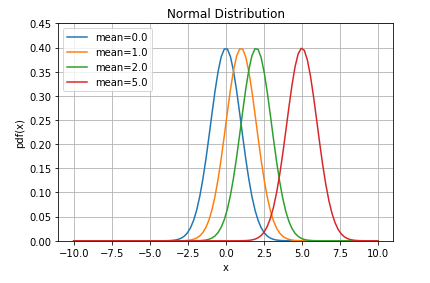

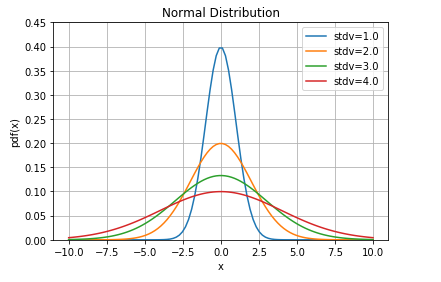

## Bivariate Normal Distribution
When we use two variables X1 and X2 for random distribution. Vriables X1 and X2 are bivariately normally distributed with mean vector components μ1 and μ2 and the standard deviation for two variables are σ1 and σ2.
The variables have correlation parameter denoted by ρ.
And Using these values we construct varance-covariance matrix as shown below:
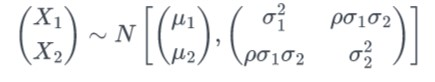

#### Joint Probability Density Function for Bivariate Normal Distribution
bivariate normal distribution is given by
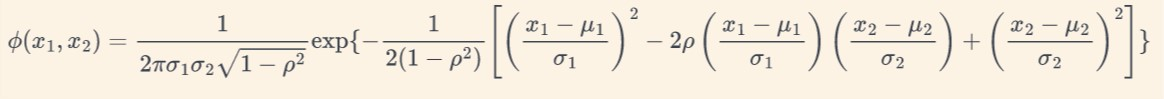

If use the covariance matrix as Σ and the ector for μ1 and μ2 as μ and X as the vector for [ x1, x2 ] we get the equation as below:
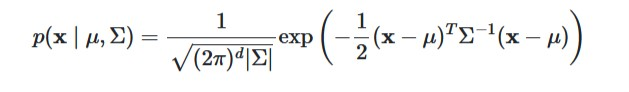

In [75]:
# Implementing the Bivariate Normal distribution function (as shown in above formula) for ploting the contour on floor using two variables
# mean - mean vector [mu1, mu2]
# x - Bivariate vector [[x1], [x2]]
# covariance - variance covariance vector
def pdf_BND(x, mean, covariance):
    # x_m  is the vector for (X - mu)
    x_m = x - mean
    return np.linalg.det((1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(covariance)))) * 
            np.exp(-(np.matmul(np.matmul(x_m.transpose(), np.linalg.inv(covariance)), x_m) / 2)))

# Implementing the univariate Normal distribution (as shown in above formula) PDF for ploting the PDF for each variable in adjacent walls of the 3D graph
# x - is the point
# mean - mean of whole range of x
# variance - is the variance square of step-deviation
def pdf(x, mean, variance):
    return (1/np.sqrt(2* np.pi * variance) * np.exp( -((x - mean) ** 2)/(2*variance)))

#### Here the standard value are taken for reproducing the Bivariate Normal distribution curve

##### sigma_1 - is step deviation for variable 1 (You can change the value here)
##### sigma_2 - is step deviation for variable 2 (You can change the value here)
##### Initial value of rho is taken 0, we will see later how changing values of rho effects the plot

In [76]:
plt.rcParams["figure.figsize"] = [8, 8]

# Initial value of mu vector
mu = [0, 0]

# Initial value of rho (correlation)
rho = 0

# Stepdeviation for variable 1 - is taken 1
sigma_1 = 1

# step deviation for variable 2 - is taken 1.25
sigma_2 = 1.25

# covariance matrix is constructed using sigma_1, sigma_2, rho
covariance = [
    [sigma_1**2, rho*sigma_1*sigma_2],
    [rho*sigma_1*sigma_2, sigma_2**2]
]

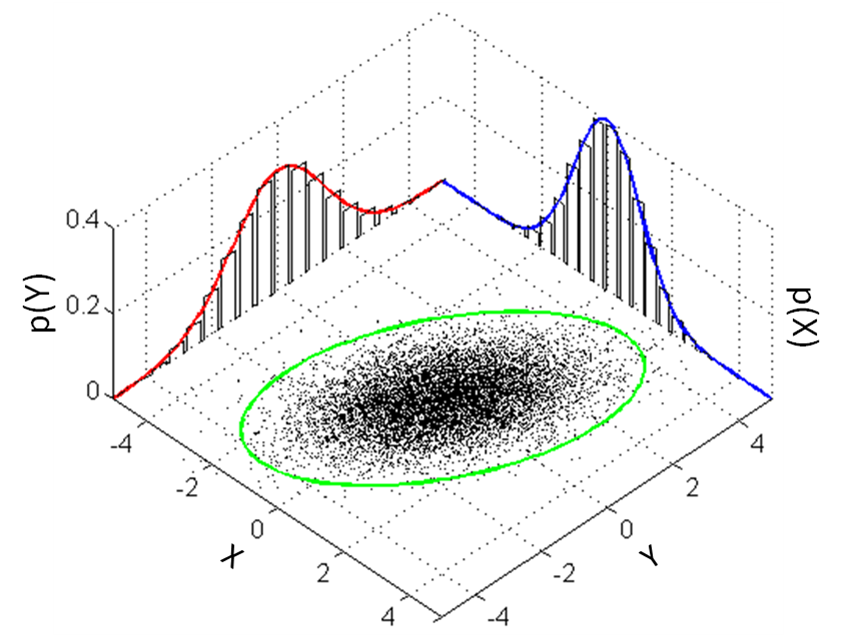
We need to replicate this sample. So lets call PDF of variable X curve 1 and PDF of variable Y curve 2.

Now we need to generate sample sequence for variable 1. Since I have taken range (-4, 4) for both variables. Here curve1_x is the sequence of variable for variable-1 And also same sequence will be used to plot the curve 1.
curve1_x contains sequence of values with interval 0.1 like [-4.0, -3.9, -3.8 .... 3.8, 3.9]
Now we need y cordinates also for plotting curve 1 in x-z plane with y = 4.0, So curve1_y are those cordinates.
curve1_rand_x = generates 1000 random variates for the histogram from which the probability distribution is taken.

In [77]:
curve1_x = np.arange(-4, 4, 0.1)
curve1_y = np.array([4] * len(curve1_x))
curve1_rand_x = norm.rvs(loc=mu[0], scale=np.sqrt(covariance[0][0]), size=1000)

Similiarly for curve2 also we need to generate sample sequence and random variate sequence. But since the curve 2 will be plotted on y-z plance with x = -4.0 so the cordinates are exchanged.

In [78]:
curve2_y = np.arange(-4, 4, 0.1)
curve2_x = np.array([-4] * 80)
curve2_rand_y = norm.rvs(loc=mu[1], scale=np.sqrt(covariance[1][1]), size=1000)

Now that the sample variables sequence are generated we can calculate their mean and offcourse it will be approx (0) because the sample sequence is equally spaced 

In [79]:
mu[0] = np.mean(curve1_x)
mu[1] = np.mean(curve2_y)
print(mu)

[-0.04999999999999649, -0.04999999999999649]


Now we need to also generate the histogram for curve 1, 2 But since we cannot change the plane of histogram in matplotlib we take the bins weight (in heights) and bins edges values to plot the bar graph in same plane as curve 1, 2 with bins weight and at cordinates 

In [80]:
#histogram for PDF of variable-1
n1 = np.histogram(curve1_rand_x, density=True, bins=20);
heights = n1[0]       # the bins weights of the histogram
x_cord = n1[1][:20]   # edges co ordinates of the histogram to be plotted with base parallel to x-axis

#histogram for PDF of variable-2
n2 = np.histogram(curve2_rand_y, density=True, bins=20);
heights_2 = n2[0]     # the bins weights of the histogram
y_cord = n2[1][:20]   # edges co ordinates of the histogram to be plotted with base parallel to y-axis

Since every time the value of rho is changes using the slider the covariance matrix chnages and accordingly the floor contour will also change. As we can see in these example how the bivariate graph depends on the correlation variable ρ.

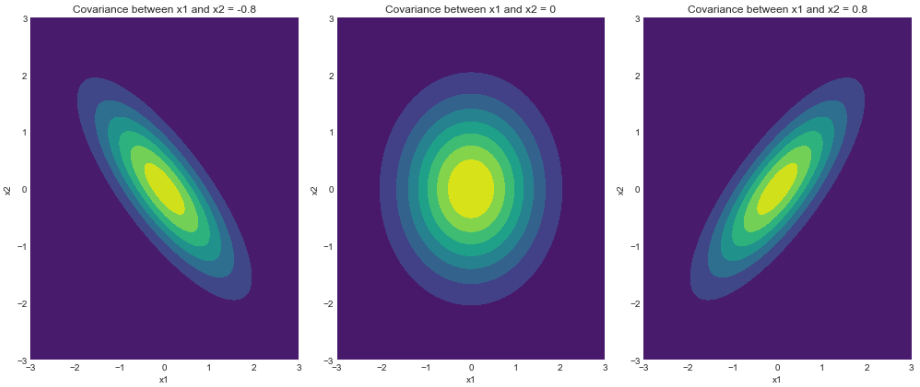

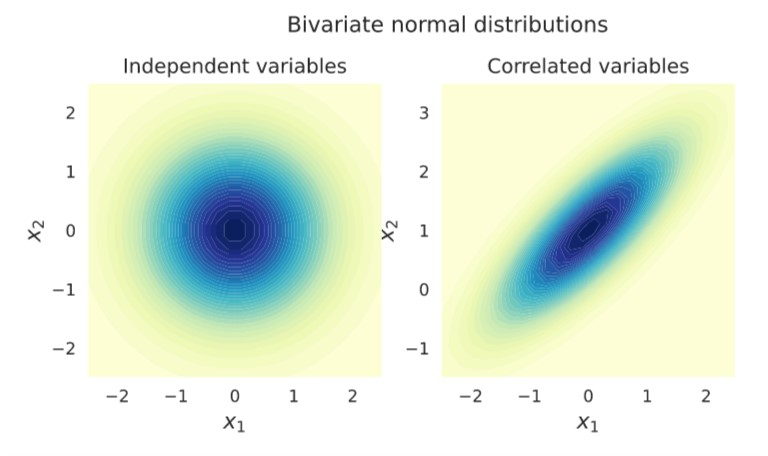

So we need to accordingly change the z values in plotting function. This function here updates the covariance matrix based upon value of rho and the returns the z co-ordinates for each combination of cordinates in curve1_x and curve2_y using the Bvariate normal distribution function that we implemented above.

In [81]:

#Ploting the contour on floor
def bivariate_plot_points(rho):
    covariance = [
        [sigma_1**2, rho*sigma_1*sigma_2],
        [rho*sigma_1*sigma_2, sigma_2**2]
    ]
    length = len(curve1_x)
    z = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            z[i, j] = pdf_BND(np.matrix([[curve1_x[i]], [curve2_y[j]]]), mu, covariance)
    return z



Here the all the graphs are plotted $\mu_1$ is mean for curve 1 in green color, $\mu_2$ is mean for curve 2 in red color. You can slide both of these to chnage their respective values. $\rho$ is the correlation parameter between variable 1 and 2.


In [82]:

# Plot the curve1, curve2, histogram for both curves and bivariate distribution in x-y plane.
def plot(mu1=mu[0], mu2=mu[1], rho=rho):
    # Initialize a 3D object for 3D plotting
    ax = plt.axes(projection='3d')
    sns.set_style('whitegrid')
    # Set x, Y axis limits
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    # Set the titles and lebels
    plt.title('Bivariate Normal Distribution', fontsize=16)
    plt.xlabel('X', fontsize=18)
    plt.ylabel('Y', fontsize=18)
    ax.set_zlabel('p(X)', fontsize=18)
    
    # update the mu vector same as slider value
    mu[0] = mu1
    mu[1] = mu2
    
    # plot the histogram for curve1 in x-z plane
    ax.bar(x_cord, heights, zs=4, zdir='y', color='w', edgecolor='k', width=0.2, alpha=0.45);
    # plot the hiostogram for curve2 in y-z plane
    ax.bar(y_cord, heights_2, zs=-4, zdir='x', color='w', edgecolor='k', width=0.2, alpha=0.45);
    # Both curves are plotted using PDF function implemented above
    # plot the PDF in x-z plane for curve 1 for variable -1 normal distribution
    ax.plot3D(curve1_x, curve1_y, pdf(curve1_x, mu[0], covariance[0][0]), color='g');
    # plot the PDF in y-z plane for curve 2 for variable -2 normal distribution
    ax.plot3D(curve2_x, curve2_y, pdf(curve2_y, mu[1], covariance[1][1]), color='r');
    #plot the bivariate normal distribution for both variable-1 and 2 usning the pdf_BND function implemented aboe
    ax.contourf(curve1_x, curve2_y, bivariate_plot_points(rho), colors=['white','black'], alpha=0.6, levels=1000);

# widgets for changing values of mean for both cuves and correlation parameter rho
widgets.interact(plot, mu1=widgets.FloatSlider(
    value=mu[0],
    min=-3.99,
    max=3.99,
    step=0.01,
    description=r'$\mu_1$:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
), mu2=widgets.FloatSlider(
    value=mu[1],
    min=-3.99,
    max=3.99,
    step=0.01,
    description=r'$\mu_2$:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
), rho=widgets.FloatSlider(
    value=rho,
    min=-0.99,
    max=0.99,
    step=0.01,
    description=r'$\rho$:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
))




interactive(children=(FloatSlider(value=-0.04999999999999649, description='$\\mu_1$:', max=3.99, min=-3.99, st…

<function __main__.plot(mu1=-0.04999999999999649, mu2=-0.04999999999999649, rho=0)>